model-f6b98070.onnx not found, downloading...

Saved under model-f6b98070.onnx


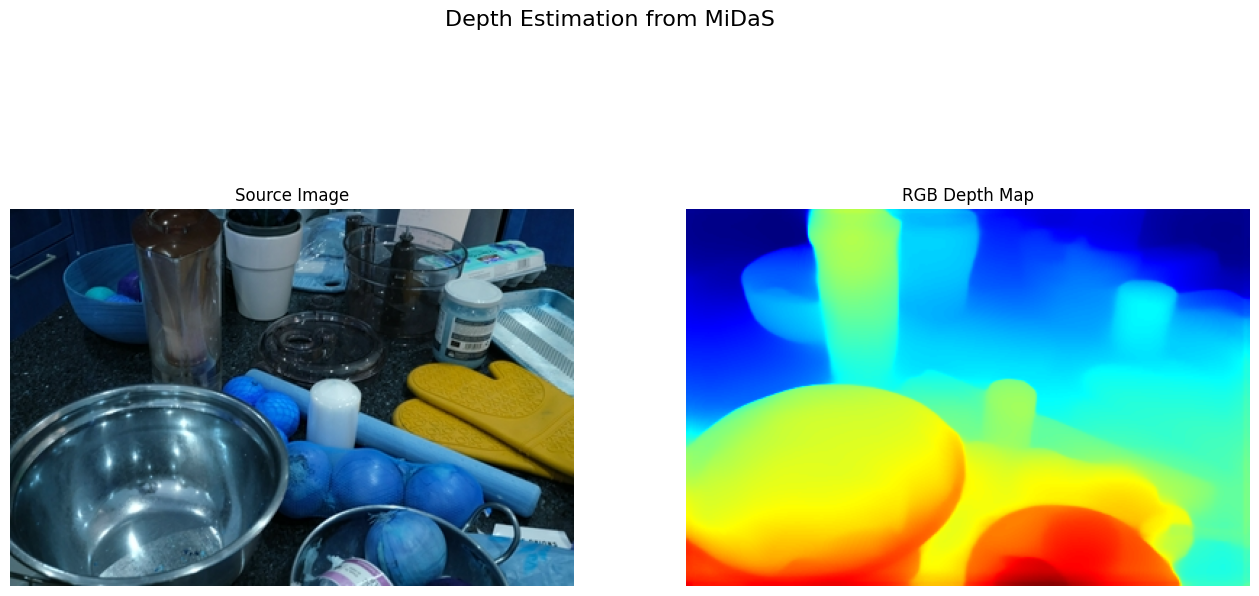

In [3]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os

# Load the input image
img_bgr = cv.imread('example.jpg')
img = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
imgHeight, imgWidth, channels = img.shape

#model_name = "model-small.onnx"  # MiDaS v2.1 Small
model_name = "model-f6b98070.onnx"; # MiDaS v2.1 Large

# Check if the model file exists
if not os.path.exists(model_name):
    print(f"{model_name} not found, downloading...")
    !python -m wget https://github.com/isl-org/MiDaS/releases/download/v2_1/model-f6b98070.onnx
    #!python -m wget https://github.com/isl-org/MiDaS/releases/download/v2_1/model-small.onnx
else:
    print(f"{model_name} already exists, skipping download.")

# Load the model
model = cv.dnn.readNet(model_name)
if model.empty():
    print("Could not load the neural net! - Check path")

model.setPreferableBackend(cv.dnn.DNN_BACKEND_CUDA)
model.setPreferableTarget(cv.dnn.DNN_TARGET_CUDA)

# Preprocess the image for the model
blob = cv.dnn.blobFromImage(img, 1/255., (384,384), (123.675, 116.28, 103.53), True, False)
model.setInput(blob)

# Perform forward pass
output = model.forward()

# Post-process the output
output = output[0, :, :]
output = cv.resize(output, (imgWidth, imgHeight))

# Normalize the depth map to a 0-1 range
output_normalized = cv.normalize(output, None, 0, 1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)

# Convert the depth map to a heatmap
output_colored = cv.applyColorMap((output_normalized * 255).astype(np.uint8), cv.COLORMAP_JET)

# Convert the original image back to BGR and display
img_bgr_display = cv.cvtColor(img, cv.COLOR_RGB2BGR)
plt.figure(figsize=(16, 8))
plt.suptitle('Depth Estimation from MiDaS', fontsize=16)

# Source Image
plt.subplot(1, 2, 1)
plt.imshow(img_bgr_display)
plt.title('Source Image', fontsize=12)
plt.axis(False)

# RGB Depth Map
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(output_colored, cv.COLOR_BGR2RGB))
plt.title('RGB Depth Map', fontsize=12)
plt.axis(False)

plt.show()